In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [3]:
# fetch dataset
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 

heart_disease_df = pd.DataFrame()
heart_disease_df = pd.concat([X,y],axis=1)

In [4]:
heart_disease_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [5]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [6]:
heart_disease_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [7]:
heart_disease_df['ca'].value_counts()

ca
0.0    176
1.0     65
2.0     38
3.0     20
Name: count, dtype: int64

In [8]:
heart_disease_df['thal'].value_counts()

thal
3.0    166
7.0    117
6.0     18
Name: count, dtype: int64

In [9]:
heart_disease_df['num'].value_counts()

num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

In [10]:
heart_disease_df['ca'] = heart_disease_df['ca'].fillna(heart_disease_df['ca'].mode()[0])
heart_disease_df['thal'] = heart_disease_df['thal'].fillna(heart_disease_df['thal'].mode()[0])

In [228]:
heart_disease_df['diagnosis'] = heart_disease_df['num'].apply(lambda x:0 if x==0 else 1)

# Visualizing the Dataset

### Histogram

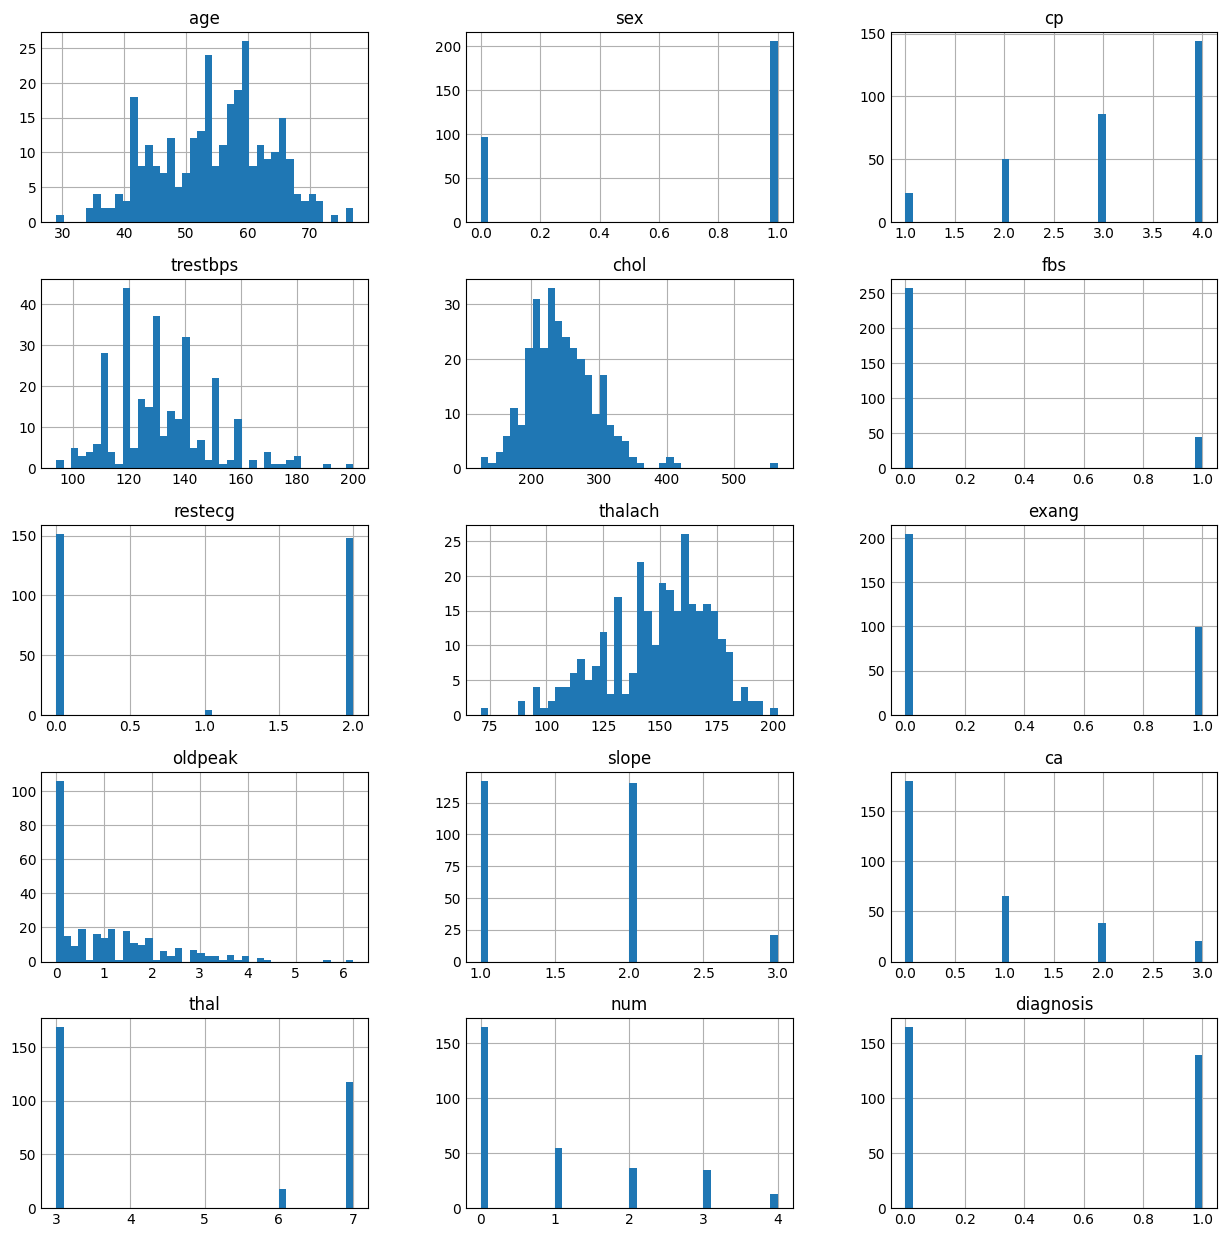

In [294]:
heart_disease_df.hist(bins=40,figsize=(12,12),layout=(5,3))
plt.show()

### Scatter Plots

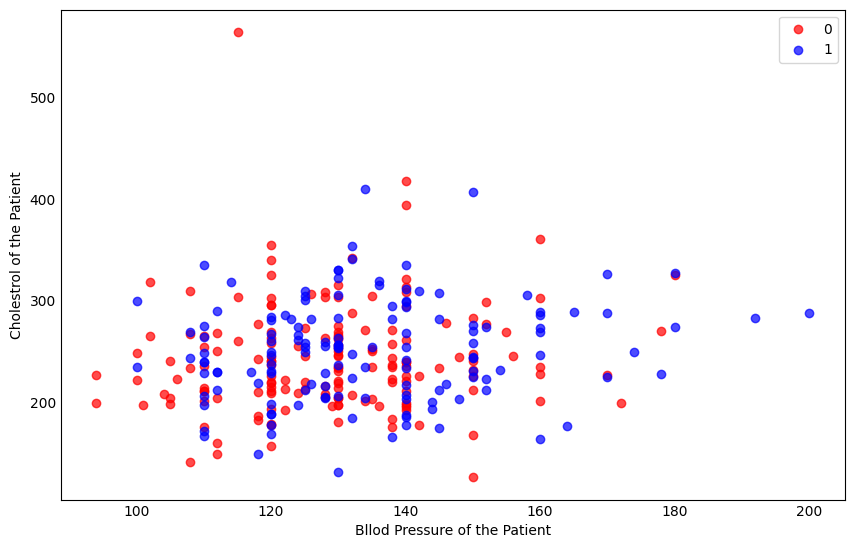

In [258]:
plt.figure(figsize=(8,5))
plt.scatter(x = heart_disease_df[heart_disease_df['diagnosis']==0]['trestbps'],y=heart_disease_df[heart_disease_df['diagnosis']==0]['chol'],c='r',alpha=0.7,label='0')
plt.scatter(x = heart_disease_df[heart_disease_df['diagnosis']==1]['trestbps'],y=heart_disease_df[heart_disease_df['diagnosis']==1]['chol'],c='b',alpha=0.7,label='1')
#plt.scatter(x = heart_disease_df[heart_disease_df['num']==2]['trestbps'],y=heart_disease_df[heart_disease_df['num']==2]['chol'],c='y',alpha=0.7,label='2')
#plt.scatter(x = heart_disease_df[heart_disease_df['num']==3]['trestbps'],y=heart_disease_df[heart_disease_df['num']==3]['chol'],c='g',alpha=0.7,label='3')
plt.xlabel('Bllod Pressure of the Patient')
plt.ylabel('Cholestrol of the Patient')
plt.grid()
plt.legend()
plt.show()

### Box Plot 

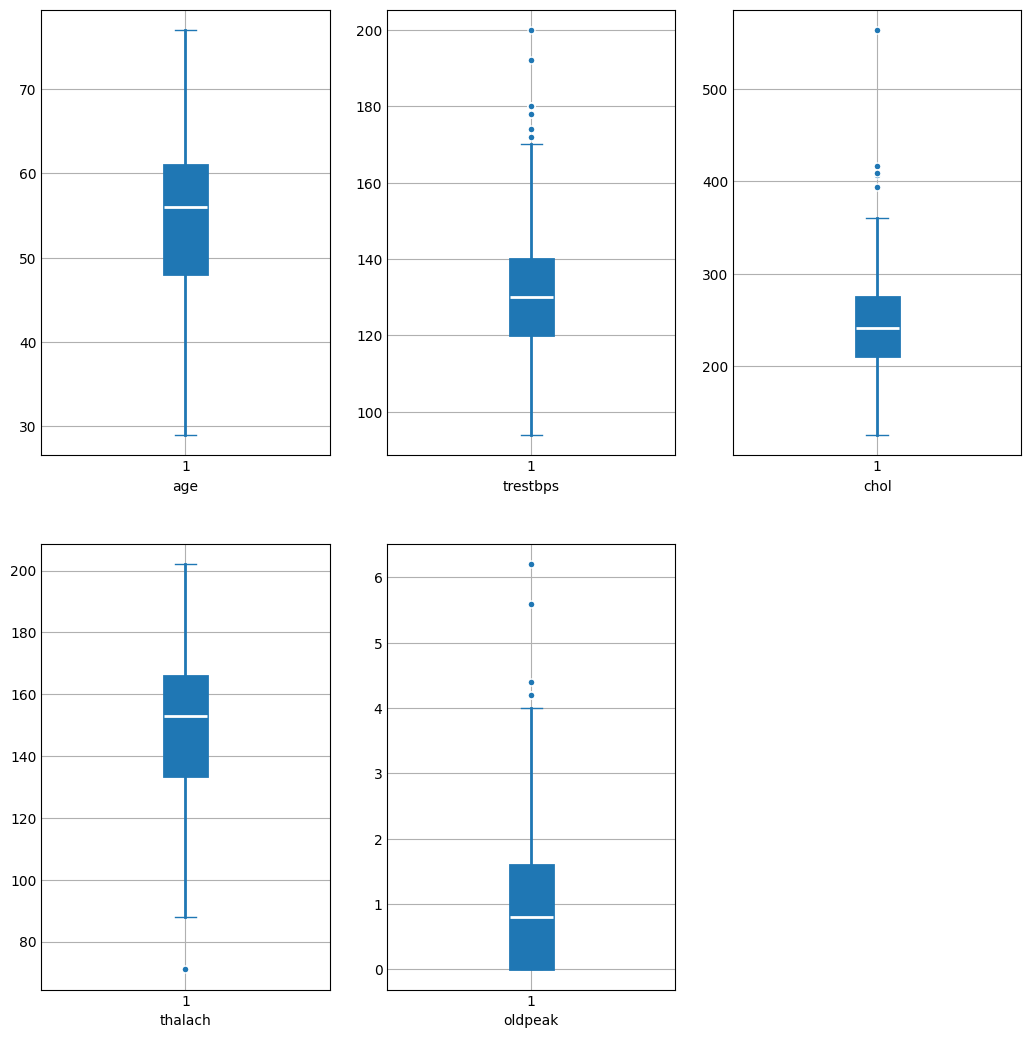

In [185]:
fig,ax = plt.subplots(2,3,figsize=(10,10))
columns = ['age','trestbps','chol','thalach','oldpeak']
index=0
for i in range(2):
    for j in range(3):
        ax[i,j].boxplot(heart_disease_df[[columns[index]]],
            patch_artist=True,
            boxprops=dict(facecolor='C0',color="C0",linewidth=2),
            capprops=dict(color="C0"),
            whiskerprops=dict(color="C0",linewidth=2),
            medianprops=dict(color="white",linewidth=2),
            flierprops=dict(markeredgecolor='white',markerfacecolor="C0",markersize=5))
        ax[i,j].set_xlabel(columns[index])
        index = index+1
        if(index==5):
            break
fig.delaxes(ax[1,2])
plt.show()

### Distribution Graph

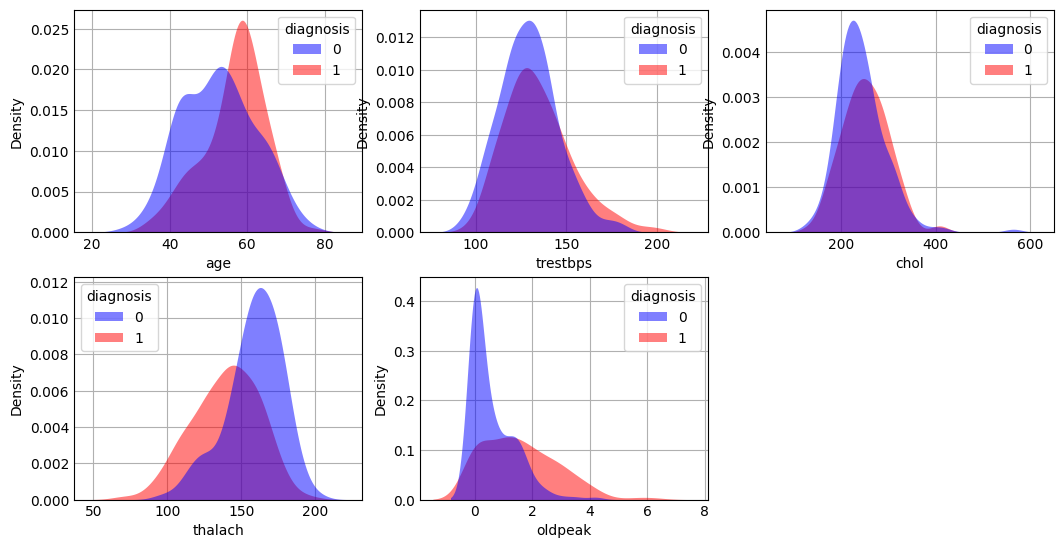

In [266]:
fig,ax = plt.subplots(2,3,figsize = [10,5])
columns = ['age','trestbps','chol','thalach','oldpeak']
index=0
for i in range(2):
    for j in range(3):
        sns.kdeplot(data=heart_disease_df,
                    x=heart_disease_df[columns[index]],
                    hue=heart_disease_df['diagnosis'],
                    ax=ax[i,j],
                    linewidth=0,
                    fill=True,
                    alpha=0.5,
                   palette={0:'blue',1:'red'})
        ax[i,j].set_xlabel(columns[index])
        index = index+1
        if(index==5):
            break

fig.delaxes(ax[1,2])
plt.show()

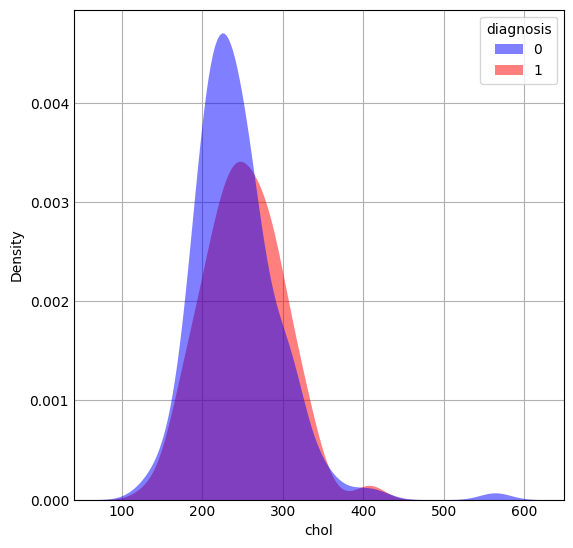

In [292]:
plt.figure(figsize=[5,5])
sns.kdeplot(data=heart_disease_df,
            x=heart_disease_df['chol'],
            hue=heart_disease_df['diagnosis'],
            linewidth=0,
            fill=True,
            alpha=0.5,
           palette={0:'blue',1:'red'})
plt.show()

### Bar Plots

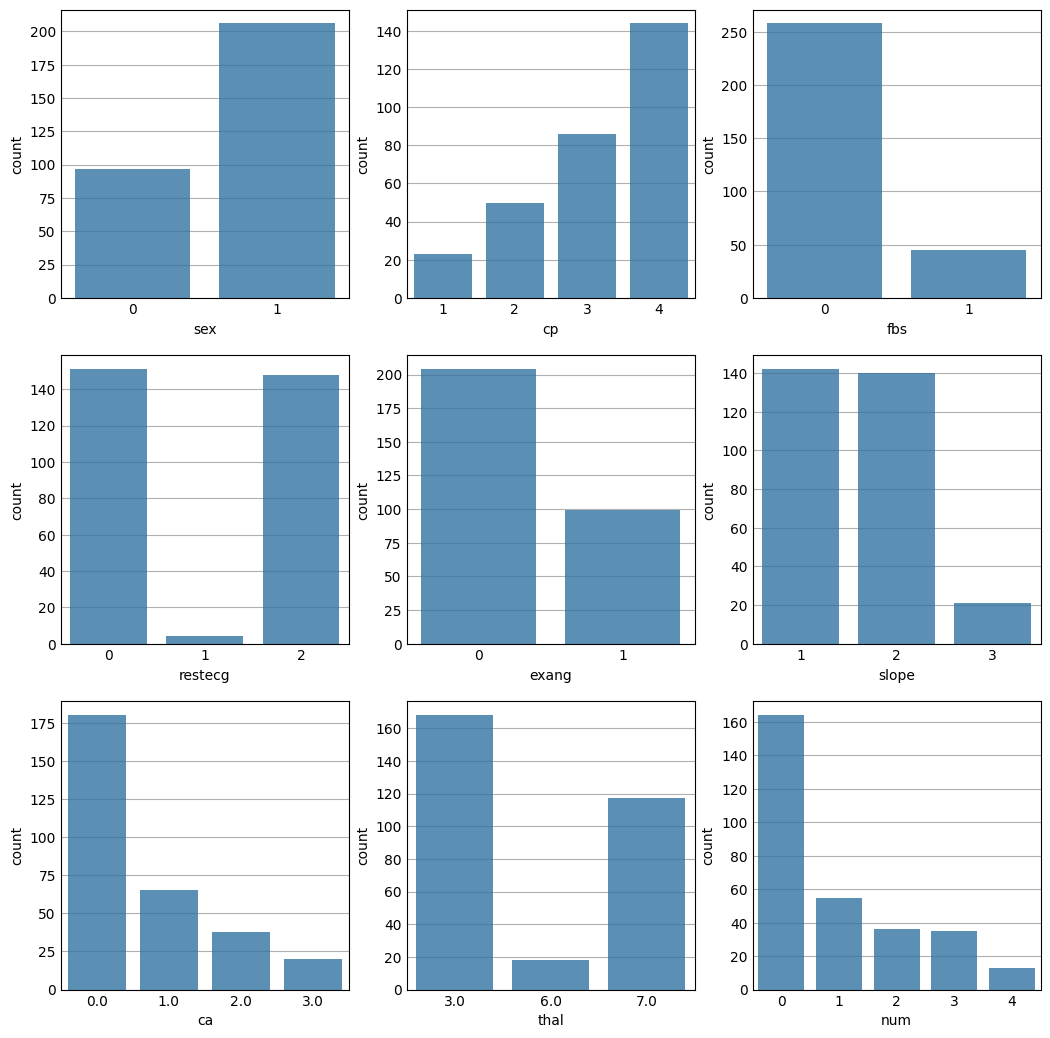

In [293]:
fig,ax = plt.subplots(3,3,figsize=[10,10])
columns = ['sex','cp','fbs','restecg','exang','slope','ca','thal','num']
index=0
for i in range(3):
    for j in range(3):
        sns.countplot(data=heart_disease_df,
                        x=heart_disease_df[columns[index]],
                        #hue=heart_disease_df['diagnosis'],
                        alpha=0.8,
                        ax=ax[i,j])
        ax[i,j].set_xlabel(columns[index])
        index=index+1

plt.show()

### Pair Plot

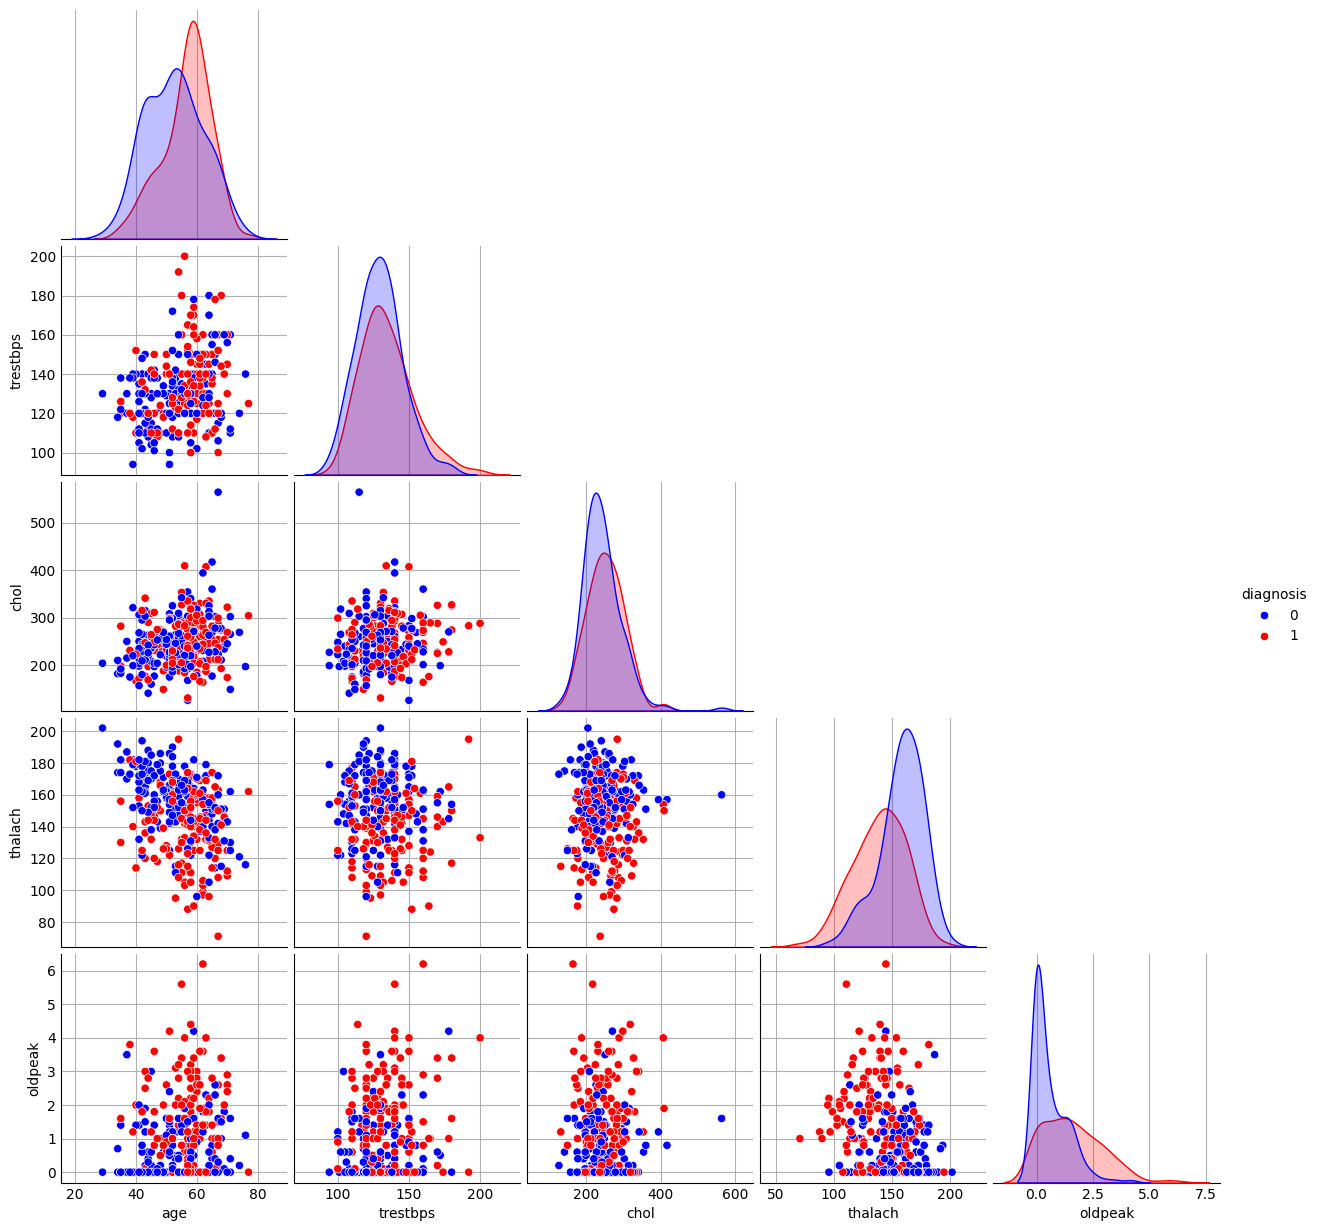

In [308]:
sns.pairplot(data=heart_disease_df[['age','trestbps','chol','thalach','oldpeak','diagnosis']],
                hue='diagnosis',
                palette={0:'blue',1:'red'})

### Correlation HeatMap

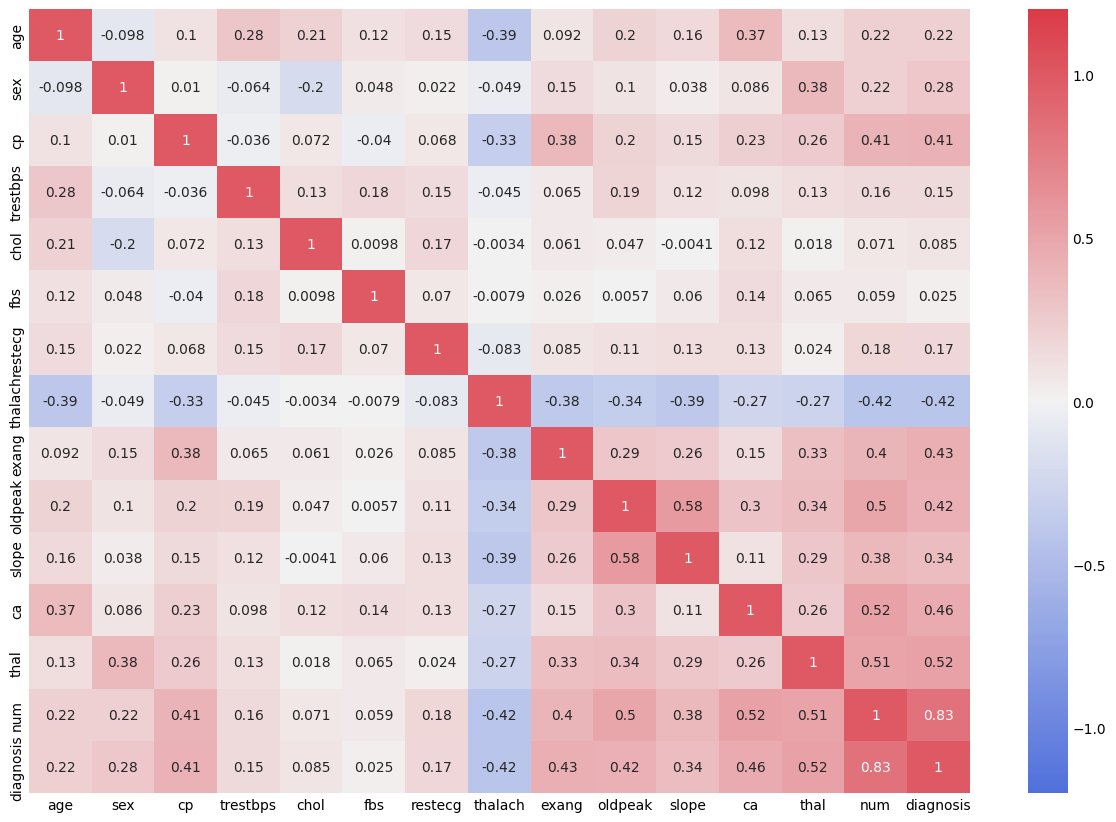

In [312]:
plt.figure(figsize=[12,8])
cmap = sns.diverging_palette(260,10,as_cmap=True)
sns.heatmap(heart_disease_df.corr(),annot=True,cmap=cmap,vmax=1.2,vmin=-1.2)
plt.show()